# **COVID-19 Open Research Dataset Challenge (CORD-19)**

## **Part 1: Data Loading and Basic Exploration**

### Importing Libraries

In [1]:
# Import all needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import os


### **I. Load The Metadata File from Local File/Online**

In [2]:
# Load/Read The CSV File.

file_name = "data/metadata.csv"
columns_names = [
    'cord_uid',
    'sha',
    'source_x',
    'title',
    'doi',
    'pmcid',
    'pubmed_id',
    'license',
    'abstract',
    'publish_time',
    'authors',
    'journal',
    'mag_id',
    'who_covidence_id',
    'arxiv_id',
    'pdf_json_files',
    'pmc_json_files',
    'url',
    's2_id',
    'errata',
    'reference_bib',
    'cited_by',
    'is_covid19',
    'has_full_text',
    'full_text_file',
    'full_text_link'
]


try:
    # Attempt to load the CSV file
    df = pd.read_csv(file_name, low_memory=False, encoding='utf-8')


    print(f"✅ CSV loaded successfully!\n")

except FileNotFoundError:
    print(f"❌ Error: `{file_name}` file not found. Please check the file path.")

except pd.errors.EmptyDataError:
    print(f"❌Error: The {file_name} file is empty. It contains no data.")

except pd.errors.ParserError:
    print(f"❌ Error: The {file_name} file is not formatted correctly as a CSV, use the proper `.csv` extension.")

except UnicodeDecodeError:
    print(f"❌ Error: Encoding issue. Try using encoding='latin1' or 'ISO-8859-1'.")

except Exception as e:
    print(f"❌ Unexpected error: {e}")


✅ CSV loaded successfully!



### **II. Basic Data Exploration**

- ***Metadata Info***

In [3]:
# Let's explore the dataframe, check for missing values and clean the data.

# Printing Data Info
print(f"--> Info about the `{file_name}` file: ")
print(f"{df.info()}\n")


--> Info about the `data/metadata.csv` file: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf

* ***First Seven Rows of Metadata*** 

In [4]:

# Printing Few Rows of The Data.
print(f"--> First Few Rows of the `{file_name}` data: ")
print(f"{df.head(7)}\n")


--> First Few Rows of the `data/metadata.csv` data: 
   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   
5  zjufx4fo  b2897e1277f56641193a6db73825f707eed3e4c9      PMC   
6  5yhe786e  3bb07ea10432f7738413dff9816809cc90f03f99      PMC   

                                               title  \
0  Clinical features of culture-proven Mycoplasma...   
1  Nitric oxide: a pro-inflammatory mediator in l...   
2    Surfactant protein-D and pulmonary host defense   
3               Role of endothelin-1 in lung disease   
4  Gene expression in epithelial cells in respons...   
5  Sequence requirements for RNA strand transfer ...   
6  Debate: Transfusing to 

- ***Metadata Column Data Types***

In [5]:

# Printing Each Column Data Types
print(f"--> Data types of each columns: ")
print(f"{df.dtypes}\n")


--> Data types of each columns: 
cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object



* ***Metadata Dataset Columns and Shape Info***

In [6]:
# Printing The Data Columns
print(f"--> Metadata Columns: ")
print(f"{df.columns}")

# Printing The Shape of The Metadata
print(f"--> Metadata Dataset Shape: ")
print(f"{df.shape}")


--> Metadata Columns: 
Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')
--> Metadata Dataset Shape: 
(1056660, 19)


* ***Checking for Missing Values in the Metadata Dataset(per Column)***

In [7]:

# Checking for any missing values in the dataset
print(f"--> Checking for missing values in any columns: ")
print(f"{df.isnull().sum()}\n")


--> Checking for missing values in any columns: 
cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64



* ***Basic Statistics for Numerical Columns***

In [8]:
# Generating Basic Statistics for Dataset
numeric_stats = df.describe(include=[np.number])
print(f"Dataset general statistics: ")
print(f"{numeric_stats}\n")


Dataset general statistics: 
       mag_id         s2_id
count     0.0  9.764680e+05
mean      NaN  2.175871e+08
std       NaN  5.312281e+07
min       NaN  9.600000e+01
25%       NaN  2.211411e+08
50%       NaN  2.320829e+08
75%       NaN  2.373948e+08
max       NaN  2.491936e+08



## **Part 2: Data Cleaning and Preparation**

### **I. Handling Missing Data**

- ***Make a Copy of the DataFrame to Prevent Affecting the Original Dataset*** 

In [9]:
# Let's make a copy of the Dataset DataFrame
print(f"--> Making a copy of the Dataset DataFrame: ")
df_clean = df.copy()
print(f"✅ Copy Successful")


--> Making a copy of the Dataset DataFrame: 
✅ Copy Successful


- ***Data Cleaning: Dropping Missing Titles or Publish Dates in the Dataset***

In [10]:

# a) Drop rows with missing titles or publish dates
print(f"--> Drop rows with missing titles or publish dates: ")
df_clean = df_clean.dropna(subset=['title', 'publish_time'])
print(f"✅ Successful")


--> Drop rows with missing titles or publish dates: 
✅ Successful


- ***Convert the `publish_time` Column to Datetime Format***

In [11]:

# b) Convert 'publish_time' to datetime, coerce errors to NaT (invalid dates)
print(f"--> Converting the `publish_time` Column to Datetime Format: ")
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
print(f"✅ Successful!")


--> Converting the `publish_time` Column to Datetime Format: 
✅ Successful!


- ***Drop Rows with Invalid Dates***

In [12]:

# c) Drop rows with invalid dates
print(f"--> Dropping Invalid Dates: ")
df_clean = df_clean.dropna(subset=['publish_time'])
print(f"✅ Successful!.")


--> Dropping Invalid Dates: 
✅ Successful!.


- ***Replace Missing Values with The Word `Unknown`***

In [13]:
# . Fill missing values in all other columns with 'Unknown'
# We exclude 'publish_time' because it’s datetime now, so filling it with 'Unknown' would break it

print(f"--> Fill up other columns with missing values, with thhe word `Unknown`: ")
cols_to_fill = df.columns.difference(['publish_time'])
df_clean[cols_to_fill] = df_clean[cols_to_fill].fillna('Unknown')
print(f"✅ Successful!.")


--> Fill up other columns with missing values, with thhe word `Unknown`: 
✅ Successful!.


- ***Recheck for Missing Values (per column)***

In [14]:
# Recheck for missing values
print(f"--> Rechecking for missing values in the dataset: ")
print(f"{df_clean.isnull().sum()}\n")
print(f"✅ Successful!.")


--> Rechecking for missing values in the dataset: 
cord_uid            0
sha                 0
source_x            0
title               0
doi                 0
pmcid               0
pubmed_id           0
license             0
abstract            0
publish_time        0
authors             0
journal             0
mag_id              0
who_covidence_id    0
arxiv_id            0
pdf_json_files      0
pmc_json_files      0
url                 0
s2_id               0
dtype: int64

✅ Successful!.


- ***Cleaned Dataset Data Info***

In [15]:
# Printing out the cleaned-up dataset info
print(f"--> The cleaned Dataset Info: \n")
print(df_clean.info(10))


--> The cleaned Dataset Info: 

<class 'pandas.core.frame.DataFrame'>
Index: 518429 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   cord_uid          518429 non-null  object        
 1   sha               518429 non-null  object        
 2   source_x          518429 non-null  object        
 3   title             518429 non-null  object        
 4   doi               518429 non-null  object        
 5   pmcid             518429 non-null  object        
 6   pubmed_id         518429 non-null  object        
 7   license           518429 non-null  object        
 8   abstract          518429 non-null  object        
 9   publish_time      518429 non-null  datetime64[ns]
 10  authors           518429 non-null  object        
 11  journal           518429 non-null  object        
 12  mag_id            518429 non-null  object        
 13  who_covidence_id  518429 non-nu

## **Part 3: Data Analysis and Visualization**

### **I. Basic Analysis**

- ***Counting Papers by Publication Year***

In [16]:
# Sort out the Year from the `publish_time` column that was converted to Datetime Format
print(f"--> First filter out the Year from the `publish_time` column that was converted to Datetime Format: ")
df_clean['year'] = df_clean['publish_time'].dt.year
print(f"✅ Filter Done Successfully\n")
print(f"--> Next, Count the papers published per year: \n")
papers_per_yr = df_clean['year'].value_counts().sort_index(ascending=False)

# This makes sure to display all rows
pd.set_option('display.max_rows', None)
print(f"{papers_per_yr}\n")

print(f"✅ Printed Successfully")


--> First filter out the Year from the `publish_time` column that was converted to Datetime Format: 
✅ Filter Done Successfully

--> Next, Count the papers published per year: 

year
2024         1
2023         1
2022     85265
2021    219335
2020    164537
2019      5629
2018      3982
2017      3691
2016      3944
2015      3461
2014      3207
2013      2948
2012      2471
2011      2337
2010      2223
2009      2542
2008      2190
2007      1682
2006      1744
2005      1553
2004      1632
2003       835
2002       703
2001       200
2000       212
1999       182
1998       152
1997       112
1996       101
1995       101
1994       104
1993       103
1992       156
1991       124
1990       116
1989       108
1988        94
1987        89
1986        82
1985        73
1984        68
1983        38
1982        39
1981        42
1980        31
1979        19
1978        26
1977        24
1976        17
1975        20
1974        14
1973        11
1972        13
1971         8
1970   

---
### 📊 **Observations on Publications per Year:**
***There was a `Massive Surge` in Publications (2019–2022):***
- **Publication Peak Years:**
  * **2021** - 219,335 papers
  * **2020** - 164,537 papers
  * **2022** - 85,265 papers

- **Explanation:**
  --> Due to the **COVID-19 pandemic**, this period saw an unprecedented volume of scientific research being published rapidly, especially related to:
  * Virology
  * Epidemiology
  * Public health
  * Vaccines and treatments
  * AI in healthcare
---
### 📌 **Summary of Trends:**

| Period    | Trend                              | Notes                                                    |
| --------- | ---------------------------------- | -------------------------------------------------------- |
| 1860–1999 | Sparse, low publication volume     | Likely due to limited digitization & lower global output |
| 2000–2018 | Gradual and steady growth          | Rise in digital journals, global access to publishing    |
| 2019–2022 | **Massive surge (esp. 2020–2021)** | COVID-19 pandemic-driven research                        |
| 2023–2024 | **Unrealistically low**            | Likely due to cleaned dataset                            |


---

- ***Identifying The Top Journals Publishing COVID-19 Research***

**A. Total Journals in the Datasets**

In [17]:
# Total Journals in the Dataset
total_journals = df_clean['journal'].count()
print(f"--> The total number of journals in the dataset: {total_journals}\n")

print(f"✅ Total Journals Successful!")


--> The total number of journals in the dataset: 518429

✅ Total Journals Successful!


**B. Top 20 Journals By Paper Count**

In [18]:
# Printing the top journals of the COVID-19 research
print(f"--> Top 20 Journals of the COVID-19 Research by Paper Count: \n")
top_journals = df_clean['journal'].value_counts().head(20)

print(f"{top_journals}\n")

print(f"✅ Printed Successfully")

--> Top 20 Journals of the COVID-19 Research by Paper Count: 

journal
Unknown                            37185
bioRxiv                             8874
Int J Environ Res Public Health     8200
PLoS One                            7154
Sci Rep                             4160
Reactions Weekly                    3698
Front Psychol                       3265
BMJ                                 3003
Cureus                              2959
Front Immunol                       2674
Viruses                             2575
BMJ Open                            2564
Front Public Health                 2440
Int J Mol Sci                       2302
J Clin Med                          1939
Vaccines (Basel)                    1819
J Med Virol                         1684
Lancet                              1673
Open Forum Infect Dis               1583
Nature                              1553
Name: count, dtype: int64

✅ Printed Successfully


### Analysis: 

* **Overall total papers:** `518,429`

* **Total = `81,660` papers from top 20 journals**

* ```python
  top_20_percent = (81660 / 518429) * 100 ≈ 15.75%
  ```
---

#### Individual Journal Percentages

| Journal                         | Count  | % of Total (518,429) |
| ------------------------------- | ------ | -------------------- |
| Unknown                         | 37,185 | 7.17%                |
| bioRxiv                         | 8,874  | 1.71%                |
| Int J Environ Res Public Health | 8,200  | 1.58%                |
| PLoS One                        | 7,154  | 1.38%                |
| Sci Rep                         | 4,160  | 0.80%                |
| Reactions Weekly                | 3,698  | 0.71%                |
| Front Psychol                   | 3,265  | 0.63%                |
| BMJ                             | 3,003  | 0.58%                |
| Cureus                          | 2,959  | 0.57%                |
| Front Immunol                   | 2,674  | 0.52%                |
| Viruses                         | 2,575  | 0.50%                |
| BMJ Open                        | 2,564  | 0.49%                |
| Front Public Health             | 2,440  | 0.47%                |
| Int J Mol Sci                   | 2,302  | 0.44%                |
| J Clin Med                      | 1,939  | 0.37%                |
| Vaccines (Basel)                | 1,819  | 0.35%                |
| J Med Virol                     | 1,684  | 0.32%                |
| Lancet                          | 1,673  | 0.32%                |
| Open Forum Infect Dis           | 1,583  | 0.31%                |
| Nature                          | 1,553  | 0.30%                |

---

#### Conclusion:

* **"Unknown"** alone makes up **7.17%** of the entire dataset.
* The **top 20 journals combined contribute \~15.75%** of all publications.
* That means the **remaining \~84.25%** of papers are spread across **thousands of other journals**, most likely with much lower individual contributions.




**C. Journals with The Most Publications During Covid-19 Peak Years [2020-2021]**

In [19]:
# First filter out the peak years of journal publications
peak_yrs = df_clean[df_clean['year'].isin([2020, 2021])]

# Total number of journal publications during covid-19 peak years
total_peak_journals = peak_yrs['journal'].count()
print(f"--> Total Publication Journals During COVID-19 Peak Years: {total_peak_journals}.\n")

# Top Journals during the COVID-19 Publication Peak Years
covid_peak_top_journals = peak_yrs['journal'].value_counts().head(20)
print(f"--> Top Journals during COVID-19 peak years by paper counts: \n")
print(f"{covid_peak_top_journals}\n")


--> Total Publication Journals During COVID-19 Peak Years: 383872.

--> Top Journals during COVID-19 peak years by paper counts: 

journal
Unknown                            30986
bioRxiv                             7170
Int J Environ Res Public Health     5803
PLoS One                            4073
BMJ                                 2809
Sci Rep                             2584
Reactions Weekly                    2390
Front Psychol                       2215
Cureus                              2191
Front Immunol                       1740
BMJ Open                            1727
Front Public Health                 1594
Int J Mol Sci                       1584
Viruses                             1476
J Clin Med                          1399
Open Forum Infect Dis               1292
Nature                              1289
Innov Aging                         1208
J Med Virol                         1204
Vaccines (Basel)                    1177
Name: count, dtype: int64



#### 📊 Quick Comparison of Totals

| Metric                            | Overall (All Years) | Peak Years (2020–2021) | Percentage(Peak of Overall) |
| --------------------------------- | ------------------- | ---------------------- | --------------------------- |
| Total publications                | 518,429             | 383,872                | ~ ```74.045%```             |
| Top 20 journal paper count        | 81,660              | 58,245                 | ~ ```71.326%```             |
| `"Unknown"` journal paper count   | 37,185              | 30,986                 | ~ ```83.329%```             |

---

#### 📊 Top 20 Journals as % of Total Papers

| Context    | Top 20 Paper Count | Total Papers | % of Total |
| ---------- | ------------------ | ------------ | ---------- |
| All Years  | 81,660             | 518,429      | `15.75%`   |
| Peak Years | 58,245             | 383,872      | `15.17%`   |

---

#### ***🔎 Observation:***
* During peak years, the top 20 journals contributed ~15.17% of total publications — slightly less concentrated than across all years.
* 74% of all papers (383,872 of 518,429) were published in just 2020–2021.




- ***Finding The Most Frequent Words in Titles***


In [20]:
from collections import Counter
import re

# Combine all titles into one string and convert to lowercase
all_titles = ' '.join(df_clean['title'].str.lower())

# Remove punctuation and numbers using regex
all_titles_clean = re.sub(r'[^a-z\s]', '', all_titles)

# Split into individual words
words = all_titles_clean.split()

# Optionally remove common stopwords manually.
stopwords = set([
    'the', 'and', 'of', 'in', 'for', 'to', 'a', 'on', 'with', 'an', 
    'by', 'at', 'from', 'is', 'are', 'as', 'that', 'this', 'be',
    'we', 'using', 'use', 'based', 'can', 'during', 'study', 'new'
])

# Filter out stopwords
filtered_words = [word for word in words if word not in stopwords]

# Count word frequencies
word_counts = Counter(filtered_words)


**A. Total Word Count**

In [21]:
# Printing total words
total_common_words = word_counts.total()

print(f"--> Total Words: {total_common_words}\n")


--> Total Words: 4931326



**B. Top 30 Most Common Words**

In [22]:

# Get top 30 most frequent words
most_common_words = word_counts.most_common(30)

# Display the top 30 most common words
print(f"--> The Top 30 Most Common Words via Word Frequency: \n")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


--> The Top 30 Most Common Words via Word Frequency: 

covid: 193107
pandemic: 53673
sarscov: 47434
patients: 46402
health: 32445
disease: 26487
infection: 23786
review: 22983
coronavirus: 21768
care: 21509
analysis: 19068
impact: 18934
clinical: 18536
case: 17696
among: 17554
respiratory: 14359
virus: 13785
acute: 13291
risk: 13280
treatment: 12348
vaccine: 12280
systematic: 11411
syndrome: 10889
cancer: 10831
after: 10779
response: 10657
human: 10485
associated: 10376
severe: 10193
against: 10096


### **II. 📊 Data Visualizations**

**1. 📅 Plot: Number of Publications Over Time [from 2000s]**

--> Plot Visualization on The Number of Publication Over Time: 



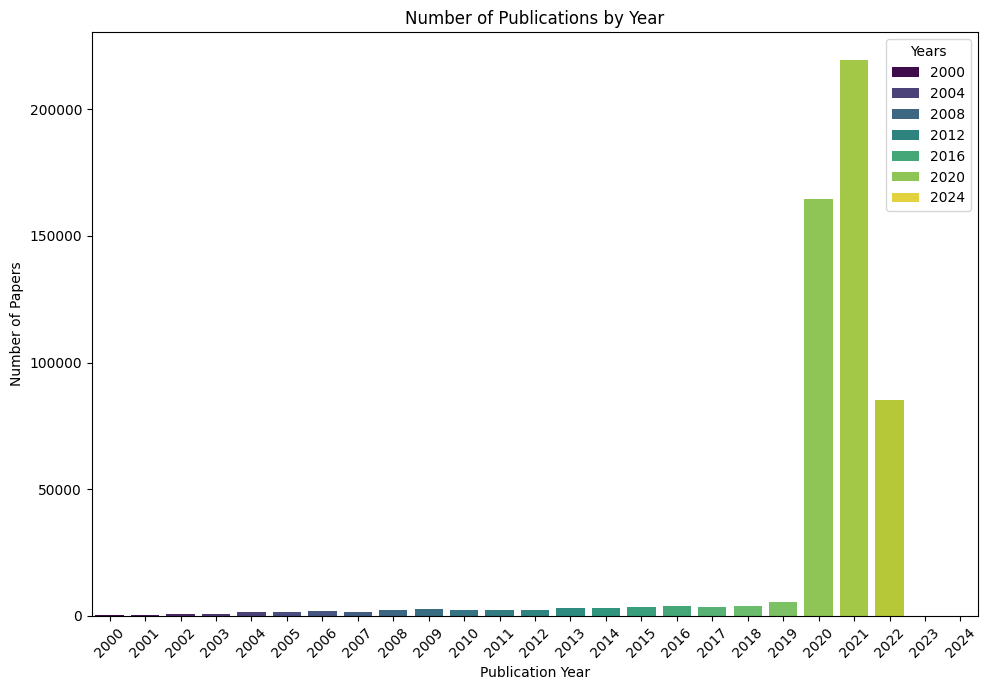

In [23]:
# Plot Visualization

df_2000s = df_clean[df_clean['year'] >= 2000]

print(f"--> Plot Visualization on The Number of Publication Over Time: \n")
plt.figure(figsize=(10, 7))
sns.countplot(data=df_2000s, x='year', palette='viridis', hue='year')
plt.title('Number of Publications by Year')
plt.xlabel('Publication Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.legend(title="Years")
plt.tight_layout()
plt.show()


#### ***🔎 Observation:***
* There is an explosive increase in the number of publications starting in 2020, marking the global outbreak of COVID-19.
* Over 200,000 papers were published in 2021 alone — the peak year.
* There’s a noticeable drop in publications in 2022 and beyond.
* From 2000 to 2019, the number of papers was relatively flat and low, indicating little COVID-related research (as the virus was unknown before late 2019).


**2. 📊 Bar Chart: Top 20 Publishing Journals**

--> Bar Chart on Top 20 Journal Publications: 


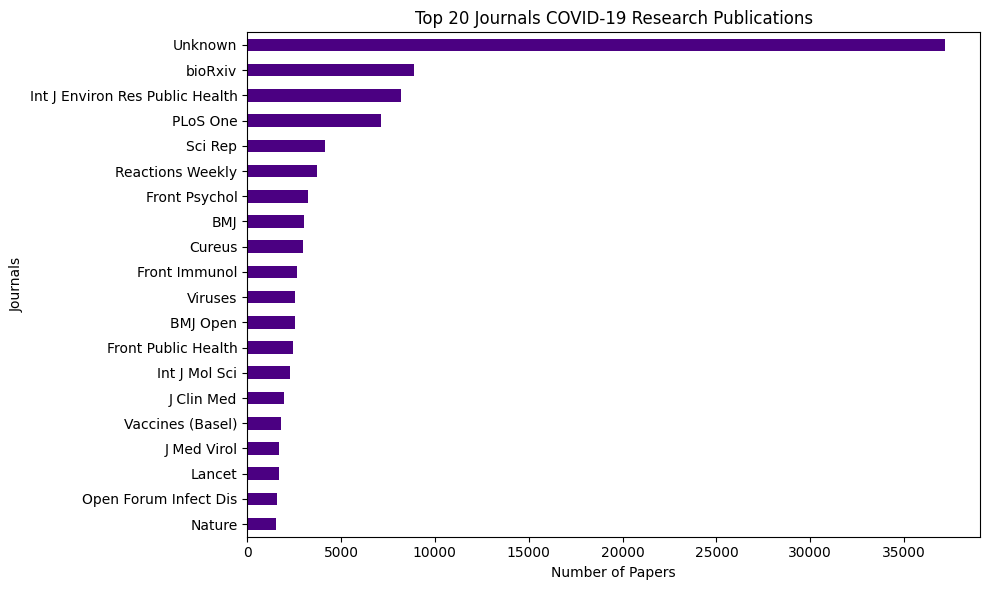

In [27]:
# Plotting Bar Chart Plot on Top Publication Journals

print(f"--> Bar Chart on Top 20 Journal Publications: ")

plt.figure(figsize=(10, 6))
top_journals.plot(kind='barh', color='indigo')
plt.title('Top 20 Journals COVID-19 Research Publications')
plt.xlabel('Number of Papers')
plt.ylabel('Journals')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### ***🔎 Observation:***
* The largest category is labeled "Unknown", contributing over 35,000 papers. Likely due to: 
    - Preprints without official journal assignments
    - Data entry errors or missing metadata
    - Unpublished or institutional reports
* bioRxiv ranks very high among known journal publication sources. 

**3. Word Cloud: Most Frequent Words in Titles**

--> WordCloud Plot on The Most Frequent Words in Titles: 


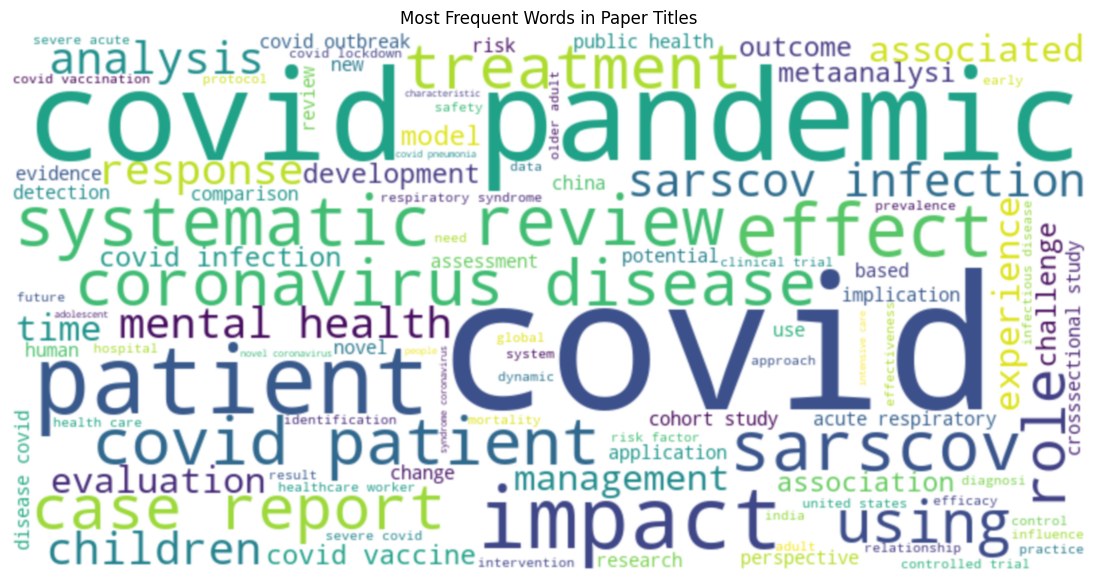

In [28]:
# Import WordCloud Library for Use
from wordcloud import WordCloud
import re

# Pllotting WordCloud on Most Frequent Words in Titles

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_titles_clean)

print(f"--> WordCloud Plot on The Most Frequent Words in Titles: ")

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.title('Most Frequent Words in Paper Titles')
plt.show()


#### ***🔎 Observation:***
* This word cloud paints a picture of extensive research on both the medical and societal effects of COVID-19, covering treatment, patient care, mental health, vaccination efforts, and global responses to the pandemic.
* The two largest words in the wordcloud, "COVID" and "pandemic," highlights the central focus of the papers.

**4. Distribution Plot of Paper Counts by Source (Top 10)**

--> Distribution Plot of Paper Counts by Sources (Top 10): 



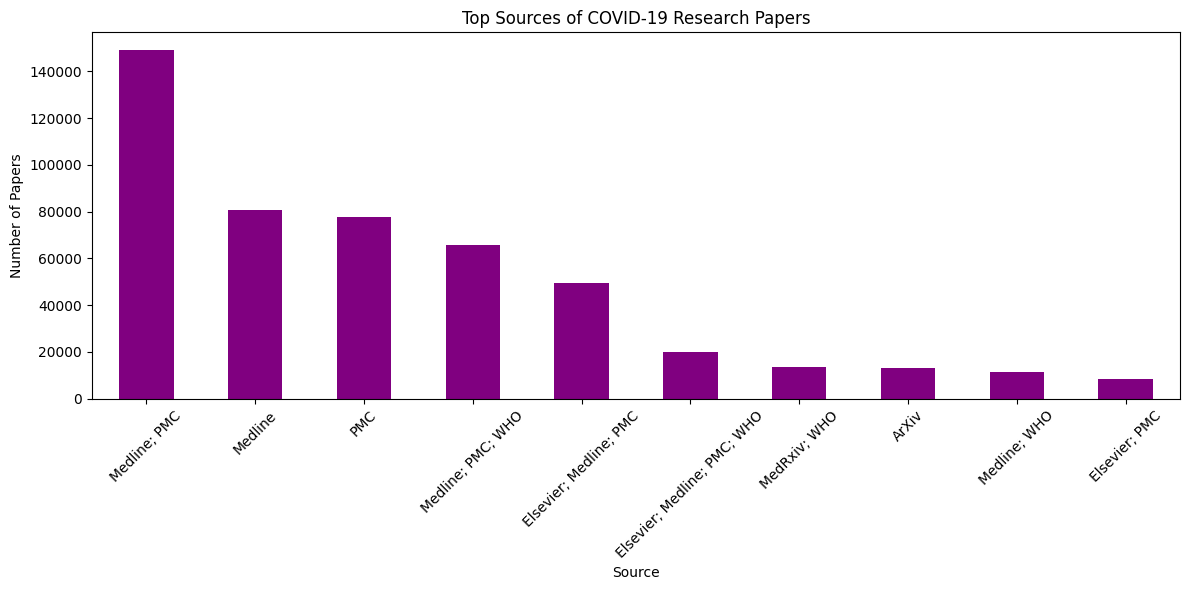

In [29]:
# Plotting a distribution plot of paper counts by source
top_sources = df_clean['source_x'].value_counts().head(10)

print(f"--> Distribution Plot of Paper Counts by Sources (Top 10): \n")
plt.figure(figsize=(12, 6))
top_sources.plot(kind='bar', color='purple')
plt.title('Top Sources of COVID-19 Research Papers')
plt.xlabel('Source')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### ***🔎 Observation:***
* This bar chart illustrates the top sources of COVID-19 research papers based on the number of papers published across various platforms.